In [59]:
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import numpy as np
from numpy import genfromtxt
import pandas as pd
import datetime
import seaborn as sns
from scipy.stats import pearsonr
import itertools
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d
from matplotlib.patches import ConnectionPatch

from google.colab import drive
drive.mount('/gdrive')
drive_loc = '/gdrive/My Drive/LSTID/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [60]:
data = pd.read_csv(drive_loc + 'lstid_driver_full_2017_exp1.csv')
data['date'] = pd.to_datetime(data['date'])
data['ae_max'].replace('1,070.00', '1070', inplace=True)
data['ae_max'] = data['ae_max'].astype(float)

In [61]:
reference_time = data['date'].iloc[0]
data['date_s'] = (data['date'] - reference_time).dt.total_seconds()
data['dpv'] = np.gradient(data['pv'], (data['date_s']))
data['dsme'] = np.gradient(data['sme'])

In [62]:
da_fil = data[data['tid'] > 0]

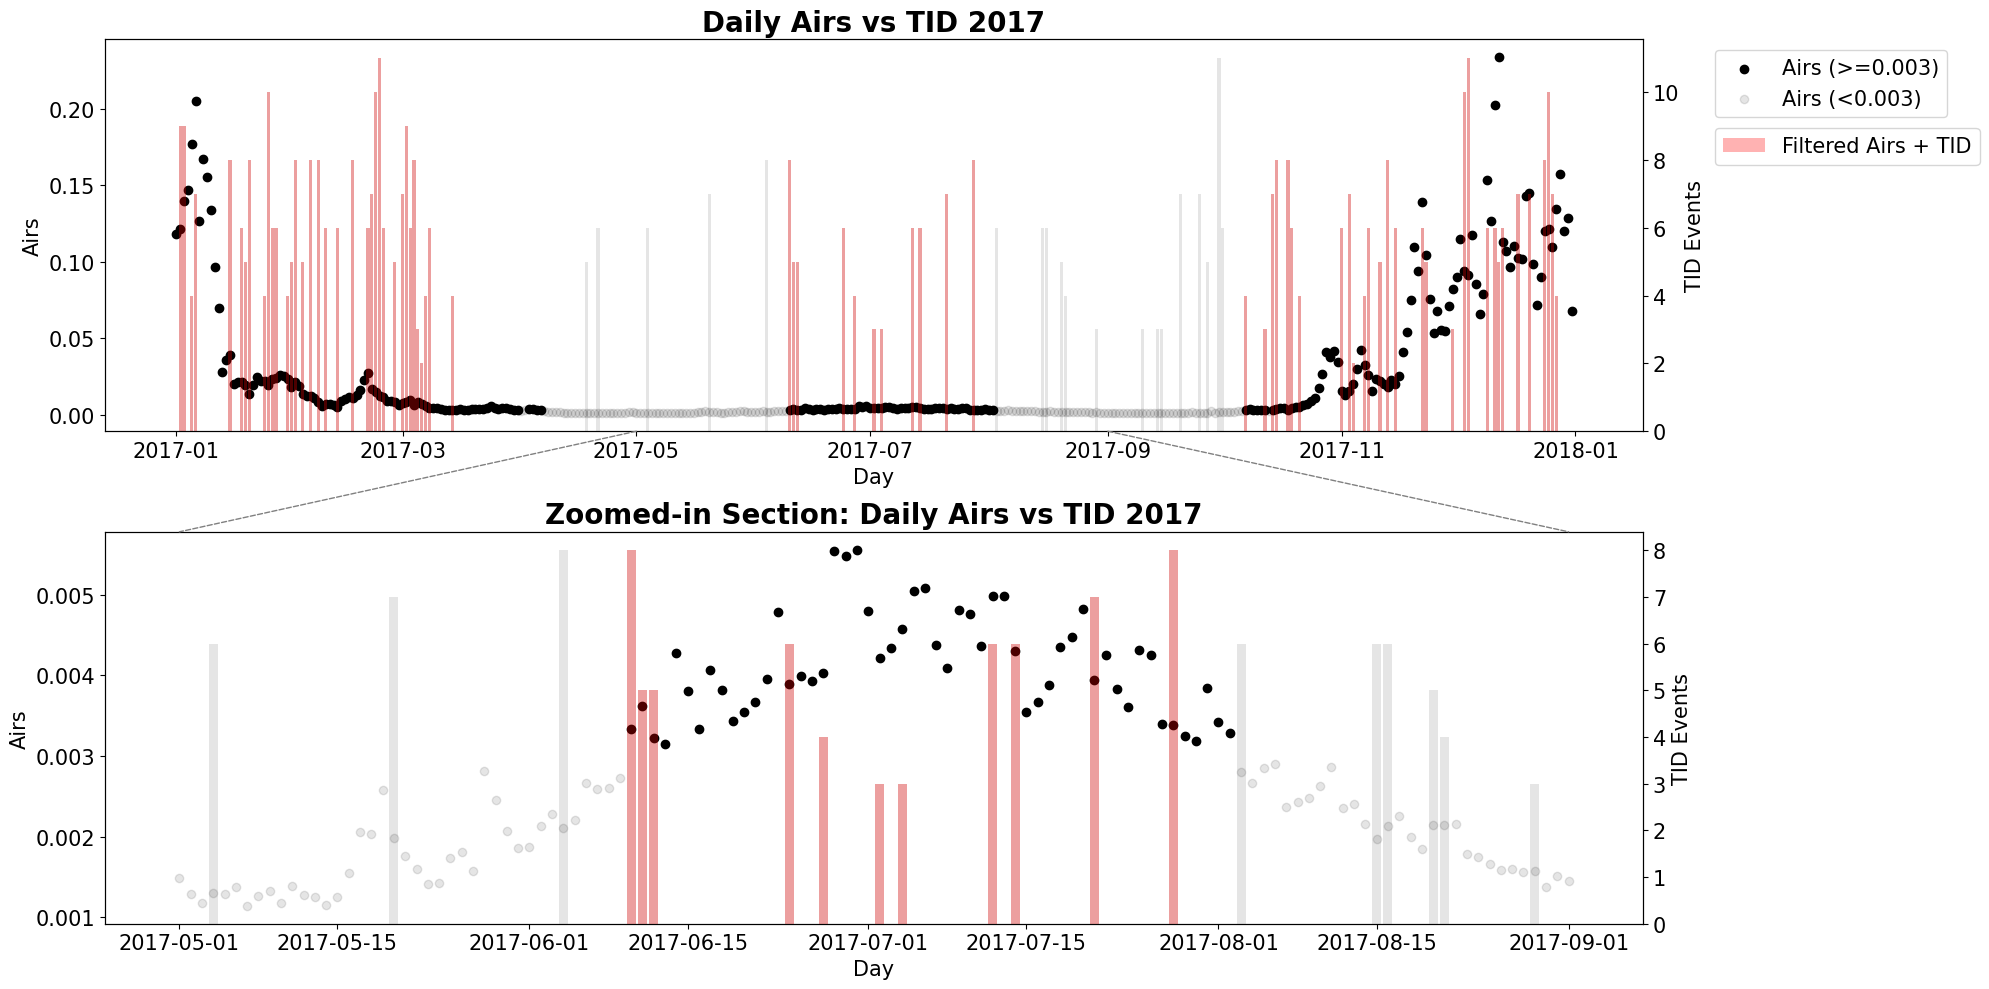

In [63]:
driver = 'airs'
oname = 'Airs'
filter = 0.003

start_date = pd.to_datetime('2017-05-01')
end_date = pd.to_datetime('2017-09-01')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

# Main plot
da = da_fil[da_fil[driver] >= filter]
da2 = data[data[driver] >= filter]
da3 = data[data[driver] < filter]

ax1.scatter(da2['date'], da2[driver], color='black', label=oname + ' (>=' + str(filter) + ')')
ax1.scatter(da3['date'], da3[driver], color='black', alpha=0.1, label=oname + ' (<' + str(filter) + ')')
ax1_twin = ax1.twinx()
ax1_twin.bar(data['date'], data['tid'], color = 'black', alpha=0.1)
ax1_twin.bar(da['date'], da['tid'], color = 'red', alpha = 0.3,  label='Filtered ' + oname + ' + TID')
ax1.set_title('Daily ' + str(oname) + ' vs TID 2017', fontsize=20, fontweight='bold')
ax1.set_ylabel(oname, fontsize=15)
ax1.set_xlabel('Day', fontsize=15)
ax1.tick_params(labelsize=15)
ax1_twin.set_ylabel('TID Events', fontsize=15)
ax1_twin.tick_params(labelsize=15)

#for index, value in da['date'].items():
#  if index == 1:
#    start = value
#    end = value + datetime.timedelta(days=1)
#    ax1.axvspan(start, start, color='red', alpha=0.4, linewidth=3, label='Filtered + TID')
#  else:
#    start = value
#    end = value + datetime.timedelta(days=1)
#    ax1.axvspan(start, start, color='red', alpha=0.4, linewidth=3)

ax1.legend(bbox_to_anchor=(1.04, 1), loc='upper left', fontsize = 15)
ax1_twin.legend(bbox_to_anchor=(1.04, 0.8), loc='upper left', fontsize = 15)

# Filter data for the zoomed-in subplot
zoomed_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
zoomed_da = da[(da['date'] >= start_date) & (da['date'] <= end_date)]
zoomed_da2 = da2[(da2['date'] >= start_date) & (da2['date'] <= end_date)]
zoomed_da3 = da3[(da3['date'] >= start_date) & (da3['date'] <= end_date)]

# Plot the zoomed-in subplot
ax2.scatter(zoomed_da2['date'], zoomed_da2[driver], color='black')
ax2.scatter(zoomed_da3['date'], zoomed_da3[driver], color='black', alpha=0.1)
ax2_twin = ax2.twinx()
ax2_twin.bar(zoomed_data['date'], zoomed_data['tid'], color = 'black', alpha=0.1)
ax2_twin.bar(zoomed_da['date'], zoomed_da['tid'], color = 'red', alpha = 0.3,  label='Filtered ' + oname + ' + TID')
ax2.set_title('Zoomed-in Section: Daily ' + str(oname) + ' vs TID 2017', fontsize=20, fontweight='bold')
ax2.set_ylabel(oname, fontsize=15)
ax2.set_xlabel('Day', fontsize=15)
ax2.tick_params(labelsize=15)
ax2_twin.set_ylabel('TID Events', fontsize=15)
ax2_twin.tick_params(labelsize=15)

#for index, value in zoomed_da['date'].items():
#    start = value
#    end = value + datetime.timedelta(days=1)
#    ax2.axvspan(start, start, color='red', alpha=0.4, linewidth=5, label='Filtered + TID')

# Adding lines to indicate the zoomed-in section
#ax1.axvline(x=start_date, color='r', linestyle='--')
#ax1.axvline(x=end_date, color='r', linestyle='--')

xyA_start = (mpl.dates.date2num(start_date), ax1.get_ylim()[0])
xyB_start = (mpl.dates.date2num(start_date), ax2.get_ylim()[1])
xyA_end = (mpl.dates.date2num(end_date), ax1.get_ylim()[0])
xyB_end = (mpl.dates.date2num(end_date), ax2.get_ylim()[1])

con = ConnectionPatch(xyA=xyA_start, xyB=xyB_start, coordsA='data', coordsB='data',
                          axesA=ax1, axesB=ax2, color='gray', linestyle='--')
fig.add_artist(con)

con = ConnectionPatch(xyA=xyA_end, xyB=xyB_end, coordsA='data', coordsB='data',
                          axesA=ax1, axesB=ax2, color='gray', linestyle='--')
fig.add_artist(con)

plt.tight_layout()
plt.show()

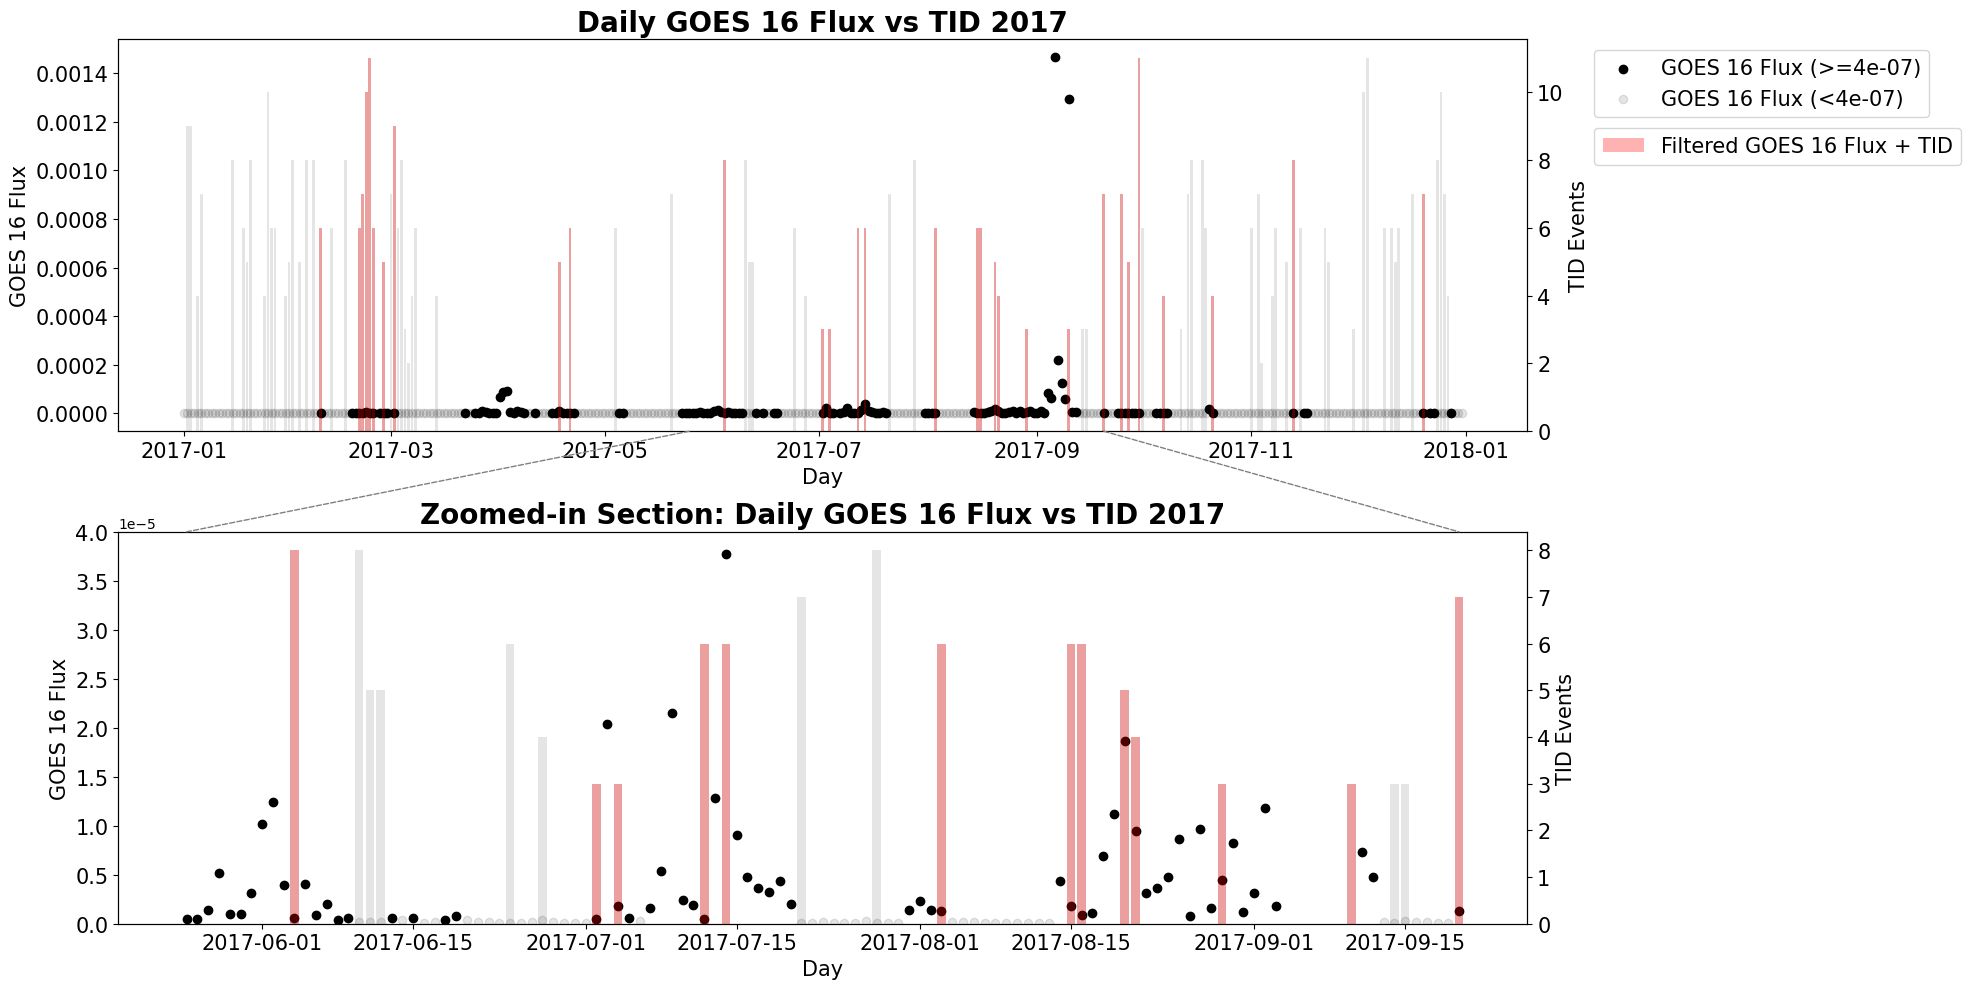

In [64]:
driver = 'xrsb_flux'
oname = 'GOES 16 Flux'
filter = 0.0000004

start_date = pd.to_datetime('2017-05-25')
end_date = pd.to_datetime('2017-09-20')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

# Main plot
da = da_fil[da_fil[driver] >= filter]
da2 = data[data[driver] >= filter]
da3 = data[data[driver] < filter]

ax1.scatter(da2['date'], da2[driver], color='black', label=oname + ' (>=' + str(filter) + ')')
ax1.scatter(da3['date'], da3[driver], color='black', alpha=0.1, label=oname + ' (<' + str(filter) + ')')
ax1_twin = ax1.twinx()
ax1_twin.bar(data['date'], data['tid'], color = 'black', alpha=0.1)
ax1_twin.bar(da['date'], da['tid'], color = 'red', alpha = 0.3,  label='Filtered ' + oname + ' + TID')
ax1.set_title('Daily ' + str(oname) + ' vs TID 2017', fontsize=20, fontweight='bold')
ax1.set_ylabel(oname, fontsize=15)
ax1.set_xlabel('Day', fontsize=15)
ax1.tick_params(labelsize=15)
ax1_twin.set_ylabel('TID Events', fontsize=15)
ax1_twin.tick_params(labelsize=15)

#for index, value in da['date'].items():
#  if index == 1:
#    start = value
#    end = value + datetime.timedelta(days=1)
#    ax1.axvspan(start, start, color='red', alpha=0.4, linewidth=3, label='Filtered + TID')
#  else:
#    start = value
#    end = value + datetime.timedelta(days=1)
#    ax1.axvspan(start, start, color='red', alpha=0.4, linewidth=3)

ax1.legend(bbox_to_anchor=(1.04, 1), loc='upper left', fontsize = 15)
ax1_twin.legend(bbox_to_anchor=(1.04, 0.8), loc='upper left', fontsize = 15)

# Filter data for the zoomed-in subplot
zoomed_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
zoomed_da = da[(da['date'] >= start_date) & (da['date'] <= end_date)]
zoomed_da2 = da2[(da2['date'] >= start_date) & (da2['date'] <= end_date)]
zoomed_da3 = da3[(da3['date'] >= start_date) & (da3['date'] <= end_date)]

# Plot the zoomed-in subplot
ax2.scatter(zoomed_da2['date'], zoomed_da2[driver], color='black')
ax2.scatter(zoomed_da3['date'], zoomed_da3[driver], color='black', alpha=0.1)
ax2_twin = ax2.twinx()
ax2_twin.bar(zoomed_data['date'], zoomed_data['tid'], color = 'black', alpha=0.1)
ax2_twin.bar(zoomed_da['date'], zoomed_da['tid'], color = 'red', alpha = 0.3,  label='Filtered ' + oname + ' + TID')
ax2.set_title('Zoomed-in Section: Daily ' + str(oname) + ' vs TID 2017', fontsize=20, fontweight='bold')
ax2.set_ylabel(oname, fontsize=15)
ax2.set_xlabel('Day', fontsize=15)
ax2.tick_params(labelsize=15)
ax2_twin.set_ylabel('TID Events', fontsize=15)
ax2_twin.tick_params(labelsize=15)
ax2.set_ylim(0, 0.00004)
#for index, value in zoomed_da['date'].items():
#    start = value
#    end = value + datetime.timedelta(days=1)
#    ax2.axvspan(start, start, color='red', alpha=0.4, linewidth=5, label='Filtered + TID')

# Adding lines to indicate the zoomed-in section
#ax1.axvline(x=start_date, color='r', linestyle='--')
#ax1.axvline(x=end_date, color='r', linestyle='--')

xyA_start = (mpl.dates.date2num(start_date), ax1.get_ylim()[0])
xyB_start = (mpl.dates.date2num(start_date), ax2.get_ylim()[1])
xyA_end = (mpl.dates.date2num(end_date), ax1.get_ylim()[0])
xyB_end = (mpl.dates.date2num(end_date), ax2.get_ylim()[1])

con = ConnectionPatch(xyA=xyA_start, xyB=xyB_start, coordsA='data', coordsB='data',
                          axesA=ax1, axesB=ax2, color='gray', linestyle='--')
fig.add_artist(con)

con = ConnectionPatch(xyA=xyA_end, xyB=xyB_end, coordsA='data', coordsB='data',
                          axesA=ax1, axesB=ax2, color='gray', linestyle='--')
fig.add_artist(con)

plt.tight_layout()
plt.show()